# IE360 Homework 1 - Hacı Mehmet İnce

## Introduction
        In this project, it is aimed to import, organize and visualize the data with python in order to examine the relationships of USD-TRY exchange rate, total number of tourists, general, accommodation and package price indices with total income from foreign visitors in usd. The data used in this project is taken from the "Electronic Data Delivery System" of the Central Bank of the Turkish Republic.

### Main Question: 
       Is total income from foreign visitors in usd related to USD-TRY exchange rate, total number of tourists, general, accommodation and package price indices?

## Preparation of Data
Required libraries imported.

In [1]:
import pandas as pd
import glob

File names are found with their location and format.

In [2]:
filenames = glob.glob("Excel_files/*.xlsx")

Excel files stored to dataframes in a list.

In [3]:
dfs = []
for f in filenames:
    data = pd.read_excel(f)
    dfs.append(data)

In [4]:
for df in dfs:
    print(df)
    print("\n"*5)

                  Tarih      TP ODEMGZS GTOPLAM  \
0               2008-01                  919539   
1               2008-02                  858751   
2               2008-03                 1221568   
3               2008-04                 1411495   
4               2008-05                 2509997   
..                  ...                     ...   
152  TP.ODEMGZS.GTOPLAM  Methodological Changes   
153                 NaN              Datasource   
154                 NaN   Data Release Calendar   
155                 NaN           Metadata Link   
156                 NaN       Revision Politicy   

                                            Unnamed: 2  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                           

In [5]:
for df in dfs:
    print(df.columns)
    print("\n")

Index(['Tarih', 'TP ODEMGZS GTOPLAM', 'Unnamed: 2'], dtype='object')


Index(['Tarih', 'TP FG J096', 'Unnamed: 2'], dtype='object')


Index(['Tarih', 'TP DK USD S YTL', 'Unnamed: 2'], dtype='object')


Index(['Tarih', 'TP SGEGI K5', 'Unnamed: 2'], dtype='object')


Index(['Tarih', 'TP FG J112', 'Unnamed: 2'], dtype='object')


Index(['Tarih', 'TP FG J0', 'Unnamed: 2'], dtype='object')




    There are a few problems.
    - The last lines of dataframes are not the data we are interested in.
    - They all have an unnecessary column named "Unnamed: 2".
    - The "Date" column must be an index.

Necessary operations were applied to all dataframes and a new list was created.

In [6]:
clean_dfs = []
for x in dfs:
    x['Tarih'] = pd.to_datetime(x['Tarih'], errors='coerce')
    x = x.dropna(subset=['Tarih'])
    x = x.set_index("Tarih")
    x = x.drop("Unnamed: 2", axis=1)
    clean_dfs.append(x)

In [7]:
for df in clean_dfs:
    print(df)
    print("\n"*5)

           TP ODEMGZS GTOPLAM
Tarih                        
2008-01-01             919539
2008-02-01             858751
2008-03-01            1221568
2008-04-01            1411495
2008-05-01            2509997
...                       ...
2019-10-01            4878255
2019-11-01            2501695
2019-12-01            1935290
2020-01-01            2065570
2020-02-01            1664208

[146 rows x 1 columns]






           TP FG J096
Tarih                
2007-09-01     149.77
2007-10-01     154.76
2007-11-01     150.54
2007-12-01     151.93
2008-01-01     148.16
...               ...
2019-11-01      650.2
2019-12-01     646.86
2020-01-01     686.07
2020-02-01     697.02
2020-03-01     698.82

[151 rows x 1 columns]






           TP DK USD S YTL
Tarih                     
2007-10-01         1.20237
2007-11-01         1.19046
2007-12-01         1.17863
2008-01-01         1.17609
2008-02-01          1.1939
...                    ...
2019-12-01         5.84815
2020-01-01         5.

In [8]:
for df in clean_dfs:
    print(df.columns)
    print("\n")

Index(['TP ODEMGZS GTOPLAM'], dtype='object')


Index(['TP FG J096'], dtype='object')


Index(['TP DK USD S YTL'], dtype='object')


Index(['TP SGEGI K5'], dtype='object')


Index(['TP FG J112'], dtype='object')


Index(['TP FG J0'], dtype='object')




Dataframes are concatenated and stored as con_df.

In [9]:
con_df = pd.concat(clean_dfs, axis=1)

In [10]:
con_df.head(10)

,TP ODEMGZS GTOPLAM,TP FG J096,TP DK USD S YTL,TP SGEGI K5,TP FG J112,TP FG J0
Tarih,,,,,,
2007-06-01,NaN,NaN,NaN,1427,NaN,NaN
2007-07-01,NaN,NaN,NaN,2102,NaN,NaN
2007-08-01,NaN,NaN,NaN,2669,NaN,NaN
2007-09-01,NaN,149.77,NaN,2144,178.03,140.13
2007-10-01,NaN,154.76,1.20237,1623,178.15,142.67
2007-11-01,NaN,150.54,1.19046,864,178.94,145.45
2007-12-01,NaN,151.93,1.17863,604,178.82,145.77
2008-01-01,919539,148.16,1.17609,642,185.84,146.94
2008-02-01,858751,150.94,1.1939,597,185.78,148.84


In [11]:
con_df.tail(10)

,TP ODEMGZS GTOPLAM,TP FG J096,TP DK USD S YTL,TP SGEGI K5,TP FG J112,TP FG J0
Tarih,,,,,,
2019-07-01,5717804,745.75,5.6824,3201,433.04,419.24
2019-08-01,7018257,744.83,5.63491,3864,438.65,422.84
2019-09-01,5702078,691.99,5.72309,3154,459.62,427.04
2019-10-01,4878255,658.67,5.79496,3207,455.1,435.59
2019-11-01,2501695,650.2,5.74155,1509,442.13,437.25
2019-12-01,1935290,646.86,5.84815,1109,441.01,440.5
2020-01-01,2065570,686.07,5.92883,NaN,447.78,446.45
2020-02-01,1664208,697.02,6.05537,NaN,448.59,448.02
2020-03-01,NaN,698.82,6.3258,NaN,446.1,450.58


There are NaN values in 2007 and 2020. That's why we are trimming these years.

In [12]:
final = con_df["2008":"2019"]
final

,TP ODEMGZS GTOPLAM,TP FG J096,TP DK USD S YTL,TP SGEGI K5,TP FG J112,TP FG J0
Tarih,,,,,,
2008-01-01,919539,148.16,1.17609,642,185.84,146.94
2008-02-01,858751,150.94,1.1939,597,185.78,148.84
2008-03-01,1221568,152.88,1.23833,851,187.25,150.27
2008-04-01,1411495,154.63,1.30297,879,188.4,152.79
2008-05-01,2509997,165.27,1.25301,1592,188.84,155.07
...,...,...,...,...,...,...
2019-08-01,7018257,744.83,5.63491,3864,438.65,422.84
2019-09-01,5702078,691.99,5.72309,3154,459.62,427.04
2019-10-01,4878255,658.67,5.79496,3207,455.1,435.59


In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2008-01-01 to 2019-12-01
Data columns (total 6 columns):
TP ODEMGZS GTOPLAM    144 non-null object
TP FG J096            144 non-null object
TP DK USD S YTL       144 non-null object
TP SGEGI K5           144 non-null object
TP FG J112            144 non-null object
TP FG J0              144 non-null object
dtypes: object(6)
memory usage: 7.9+ KB


Now we have a monthly and complete chart for 12 years. However, column names are not understandable. And values are not numeric.

In [14]:
filenames

['Excel_files/Tourists by Nationalities__GRAND TOTAL.xlsx',
 'Excel_files/096.PACKAGE HOLIDAYS Price Indices.xlsx',
 'Excel_files/(USD) US Dollar (Selling).xlsx',
 'Excel_files/D) Foreign Visitors Travel Incomes (million USD) .xlsx',
 'Excel_files/112.ACCOMMODATION SERVICES Price Indices.xlsx',
 'Excel_files/0.GENERAL Price Indices.xlsx']

In [15]:
final.columns = ["Total # of Tourists","PI Package Holidays","USD-TRY",
                 "Travel Income For Vis","PI Accomodation","PI General"]

In [16]:
cols = list(final.columns)
final[cols] = final[cols].apply(pd.to_numeric, axis=1)

/Users/mehmetince/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
final = final[["Travel Income For Vis","Total # of Tourists","USD-TRY","PI General",
               "PI Package Holidays","PI Accomodation"]]

In [18]:
final

,Travel Income For Vis,Total # of Tourists,USD-TRY,PI General,PI Package Holidays,PI Accomodation
Tarih,,,,,,
2008-01-01,642.0,919539.0,1.176086,146.94,148.16,185.84
2008-02-01,597.0,858751.0,1.193905,148.84,150.94,185.78
2008-03-01,851.0,1221568.0,1.238333,150.27,152.88,187.25
2008-04-01,879.0,1411495.0,1.302971,152.79,154.63,188.40
2008-05-01,1592.0,2509997.0,1.253010,155.07,165.27,188.84
...,...,...,...,...,...,...
2019-08-01,3864.0,7018257.0,5.634906,422.84,744.83,438.65
2019-09-01,3154.0,5702078.0,5.723090,427.04,691.99,459.62
2019-10-01,3207.0,4878255.0,5.794959,435.59,658.67,455.10


In [19]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2008-01-01 to 2019-12-01
Data columns (total 6 columns):
Travel Income For Vis    144 non-null float64
Total # of Tourists      144 non-null float64
USD-TRY                  144 non-null float64
PI General               144 non-null float64
PI Package Holidays      144 non-null float64
PI Accomodation          144 non-null float64
dtypes: float64(6)
memory usage: 7.9 KB


In [20]:
final.describe()

,Travel Income For Vis,Total # of Tourists,USD-TRY,PI General,PI Package Holidays,PI Accomodation
count,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000
mean,1665.555556,2.716921e+06,2.654544,249.454097,322.032847,278.221389
std,851.684401,1.418695e+06,1.382042,79.312686,147.707395,66.369946
min,542.000000,8.571140e+05,1.176086,146.940000,148.160000,185.780000
25%,903.750000,1.468366e+06,1.594246,182.550000,196.897500,220.422500
50%,1399.000000,2.424824e+06,2.078048,231.275000,264.965000,273.805000
75%,2413.750000,3.813712e+06,3.479527,294.340000,387.812500,305.287500
max,3864.000000,7.018257e+06,6.378340,440.500000,745.750000,459.620000


## Visualization of Data
Required library imported.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Figure 1 - Total Travel Income Foreign Visitors vs Total Number of Tourists')

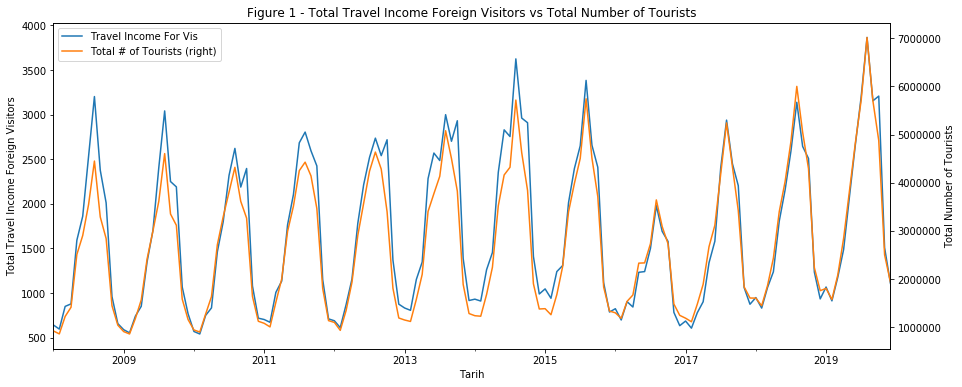

In [22]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
final[["Travel Income For Vis","Total # of Tourists"]].plot(secondary_y=["Total # of Tourists"], ax=ax)
ax.set_ylabel('Total Travel Income Foreign Visitors')
ax.right_ax.set_ylabel('Total Number of Tourists')
ax.set_title("Figure 1 - Total Travel Income Foreign Visitors vs Total Number of Tourists")

        As it is clearly seen, total travel income foreign visitors and total number of tourists are highly correlated as expected. The drop in 2016 is probably due to political reasons at that time. After 2015, the total income is less than the previous years, according to the number of tourists.

Text(0.5, 1.0, 'Figure 2 - Total Travel Income Foreign Visitors vs Price Indices')

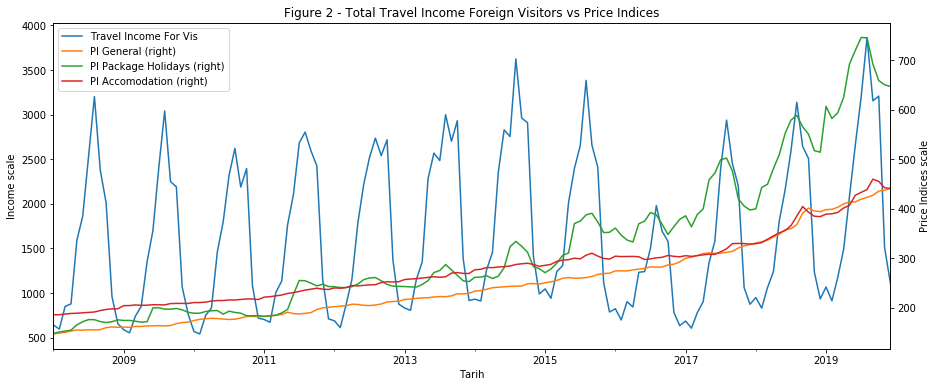

In [23]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
final[["Travel Income For Vis","PI General","PI Package Holidays",
       "PI Accomodation"]].plot(secondary_y=["PI General","PI Package Holidays","PI Accomodation"], ax=ax)
ax.set_ylabel('Income scale')
ax.right_ax.set_ylabel('Price Indices scale')
ax.set_title("Figure 2 - Total Travel Income Foreign Visitors vs Price Indices")

        There are no significant relationships between price indices and total income. However, there is much more increase in holiday packages than other indices. When the income increases, the increase in the price index of the holiday packages is probably due to the increase in the number of people who want to have a holiday in the summer.

Text(0.5, 1.0, 'Figure 3 - Total Travel Income Foreign Visitors vs USD-TRY Exchange Rate')

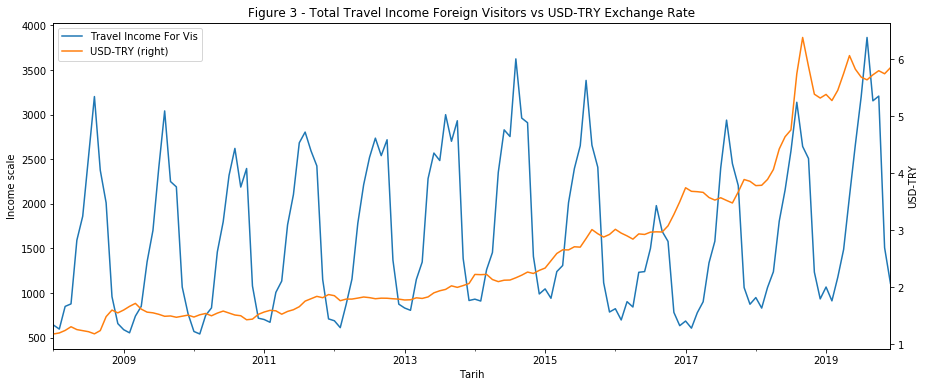

In [24]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
final[["Travel Income For Vis","USD-TRY"]].plot(secondary_y=["USD-TRY"], ax=ax)
ax.set_ylabel('Income scale')
ax.right_ax.set_ylabel('USD-TRY')
ax.set_title("Figure 3 - Total Travel Income Foreign Visitors vs USD-TRY Exchange Rate")

        While USD-TRY parity is rising rapidly, it seems that there is not much increase in income. However, the decline in income since 2016 may prevent the relationship from being seen.

In [25]:
final.corr()

,Travel Income For Vis,Total # of Tourists,USD-TRY,PI General,PI Package Holidays,PI Accomodation
Travel Income For Vis,1.000000,0.973584,0.148414,0.152608,0.269411,0.218777
Total # of Tourists,0.973584,1.000000,0.276049,0.268607,0.393958,0.325106
USD-TRY,0.148414,0.276049,1.000000,0.979555,0.970341,0.961349
PI General,0.152608,0.268607,0.979555,1.000000,0.974955,0.989013
PI Package Holidays,0.269411,0.393958,0.970341,0.974955,1.000000,0.970040
PI Accomodation,0.218777,0.325106,0.961349,0.989013,0.970040,1.000000


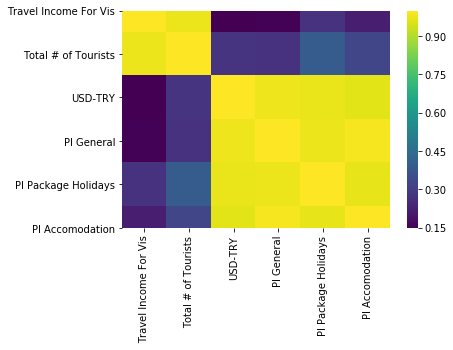

In [26]:
sns.heatmap(final.corr(),cmap="viridis")

## Conclusion
        As can be seen in the temperature map created with correlation values, general, accommodation and package price indices and USD-TRY exchange rate have a high degree of correlation between themselves, which is not a surprise. As the Turkish lira depreciates, price indices increase.
        Total income from foreign visitors in usd and total number of tourists have very high correlations, this has been seen and explained in the graph before. As more tourists come, we get more income.
        Among the indices, package holidays price indices has the strongest correlation with total income from foreign visitors. But even the strongest is only 0.27.
        My personal expectation is that as the USD-TRY parity increases, income increases. Cheaper holidays would be more attractive for tourists and as a result, I thought more tourists would come. However, the factors that cause the increase of USD-TRY parity may cause an unsafe environment for tourists.